In [71]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [72]:
data=pd.read_csv("Wholesale customers data.csv" )
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [73]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ds= sc.fit_transform(data)

In [75]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2)
kmeans.fit(ds)

KMeans(n_clusters=2)

In [76]:
print(kmeans.inertia_)
silhouette_score(ds, kmeans.labels_)


2599.384423783626


0.37323337301762427

In [77]:
kmeans= KMeans(n_clusters=2)
kmeans.fit(ds)
kmeans.inertia_

2599.3855593561393

Elbow method


In [89]:
WSS = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(ds)
    WSS.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

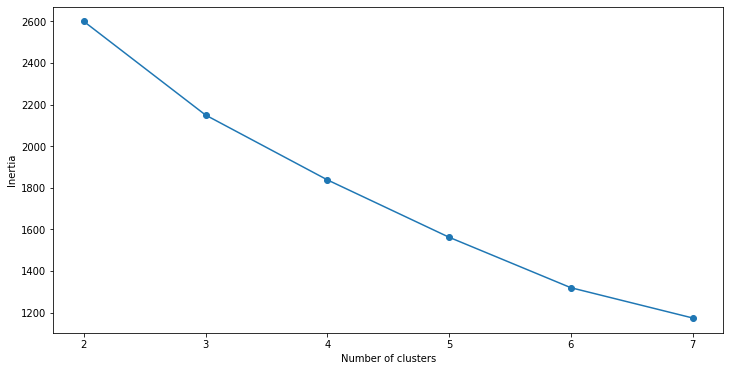

In [88]:
frame = pd.DataFrame({'Cluster':range(2,20), 'WSS':WSS})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['WSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [80]:
kmeans= KMeans(n_clusters=6)
kmeans.fit(ds)
kmeans.inertia_

1314.9218179509742

In [81]:
silhouette_score(ds, kmeans.labels_)

0.35345953314815803

In [82]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []


In [86]:
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(ds)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(ds, cluster_labels))

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

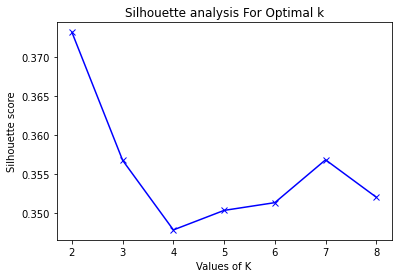

In [85]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')